<h1>Activation Functions</h1> 


<h3 style="color: yellow;">Activation functions are used in neural networks and are considered as features that introduce nonlinearity to the output of the linear neurons.</h3>

<h3 style="color: yellow;">Formally, activation functions apply a non-linear transformation to determine whether a neuron should be activated or not.</h3>


<div style="display: flex; justify-content: center;">
    <img src='bio_activation.png' width=500>
</div>


<h3 style="color: yellow;">Since the underlying ML function that models the data behavior is usually nonlinear, we need to introduce nonlinearity to the model in order to learn better representations.</h3>



<div style="display: flex; justify-content: center;">
    <img src='neurons.png' width=550>
</div>

<h3 style="color: yellow;">By omitting activation functions, neural network models tend to resemble stacks of linear regression models.</h3>


<h3 style="color: yellow;">Each neuron undergoes the application of the activation function.</h3>


<div style="display: flex; justify-content: center;">
    <img src='neurons_activated.png' width=600>
</div>

<h1>Types of Activation Functions</h1>
<ul>
 <span style="color:yellow"> <li> Step </span>
 <span style="color:yellow"> <li> Sigmoid </span>
<span style="color:yellow"> <li> TanH </span>
<span style="color:yellow"> <li> ReLU </span>
 <span style="color:yellow"> <li> Leaky RelU </span>
  <span style="color:yellow"> <li> Softmax </span>
 <span style="color:yellow"> <li> ...., and others </span>

</ul>



<h2>Step function</h2>


$$
\Large{\color{yellow}f(x, \theta) =
\begin{cases}
1 & \text{if } x >= \theta \\
0 & \text{otherwise}
\end{cases}}
$$

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

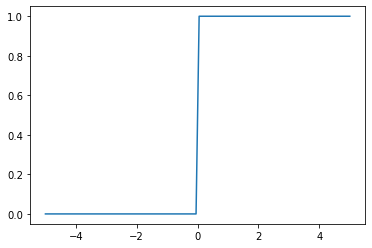

In [2]:
# NumPy implementation
def step_function(x):
  """Computes the step function for a given input array."""
  return np.where(x >= 0, 1, 0) 

x = np.linspace(-5, 5, 100)
y = step_function(x)

plt.plot(x, y)
plt.show()

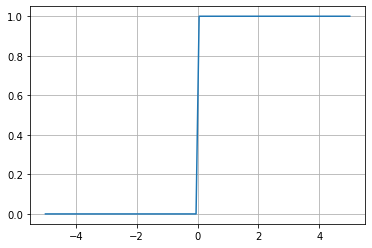

In [3]:
# torch implementation
def step_function(x):
  """Computes the Heaviside step function for a given input tensor."""
  return torch.where(x >= 0, 1, 0)

x = torch.linspace(-5, 5, 100)
y = step_function(x)

plt.plot(x, y)
plt.grid()
plt.show()

<h2>Sigmoid function</h2>
<h3 style="color: yellow;">We discussed this in the linear regression tutorial. It is commonly employed in binary classification and as an output layer for image reconstruction (autoencoder).</h3>


$$
\Large \color{yellow}f{(x)}= \frac{1}{1+\exp^{-x}}
$$

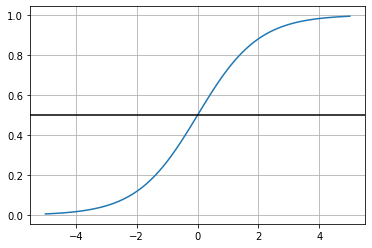

In [4]:
# NumPy implementation
def sigmoid_function(x):
  """Computes the sigmoid function for a given input array."""
  return 1/(1+np.exp(-x)) 

x = np.linspace(-5, 5, 100)
y = sigmoid_function(x)
plt.plot(x,y)
plt.axhline(y=0.5, color='k')
plt.grid()
plt.show()


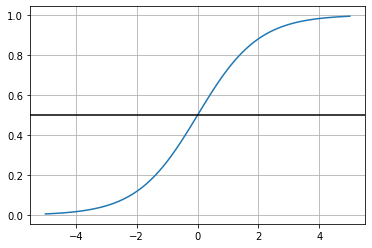

In [5]:
# torch implementation
def sigmoid_function(x):
  """Computes the sigmoid function for a given input tensor."""
  return 1/(1+torch.exp(-x)) 

x = torch.linspace(-5, 5, 100)
y = sigmoid_function(x)
plt.plot(x,y)
plt.axhline(y=0.5, color='k')
plt.grid()
plt.show()

<h2>TanH function</h2>

<h3 style="color: yellow;">It is essentially a scaled sigmoid function, magnified by 2 and shifted by 1.</h3>
<h3 style="color: yellow;">A good choice for hidden layers.</h3>


$$
\Large \color{yellow}f{(x)}= \frac{2}{1+\exp^{-2x}}-1
$$

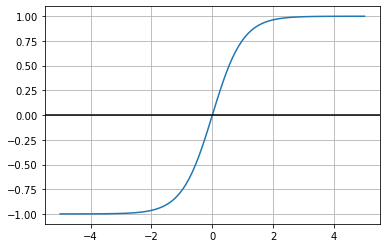

In [6]:
# NumPy implementation
def TanH_function(x):
  """Computes the sigmoid function for a given input array."""
  return (2/(1+np.exp(-2*x)))-1

x = np.linspace(-5, 5, 100)
y = TanH_function(x)
plt.plot(x,y)
plt.axhline(y=0.0, color='k')
plt.grid()
plt.show()


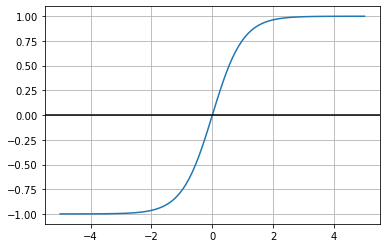

In [7]:
# torch implementation
def TanH_function(x):
  """Computes the sigmoid function for a given input tensor."""
  return (2/(1+torch.exp(-2*x)))-1

x = torch.linspace(-5, 5, 100)
y = TanH_function(x)
plt.plot(x,y)
plt.axhline(y=0.0, color='k')
plt.grid()
plt.show()


<h2>ReLU function</h2>

<h3 style="color: yellow;">The most popular choice in the majority of deep learning models.</h3>
<h3 style="color: yellow;">If you're uncertain about which activation function to employ in the hidden layers, simply opt for ReLU.</h3>
<h3 style="color: yellow;">Although it appears linear, it introduces nonlinearity.</h3>


$$
\Large \color{yellow}f{(x)}= \max(0,x)
$$

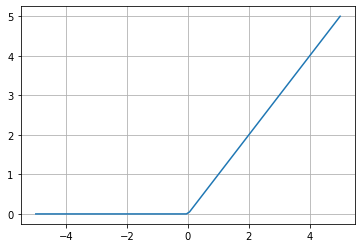

In [8]:
# NumPy implementation

def relu(x):
  """Computes the relu function for a given input array."""
  return np.maximum(0,x)

x = np.linspace(-5, 5, 100)
y = relu(x)
plt.plot(x,y)
plt.grid()
plt.show()


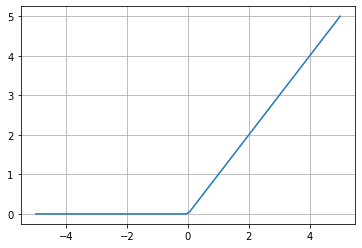

In [36]:
# torch implementation
def relu(x):
  """Computes the relu function for a given input tensor."""
  return torch.maximum(torch.zeros(x.shape[0]),x)  # (0,x) will not work, we need a tensor not int

x = torch.linspace(-5, 5, 100)
y = relu(x)
plt.plot(x,y)
plt.grid()
plt.show()


<h2>Leaky ReLU function</h2>

<h3 style="color: yellow;">A slightly improved version of ReLU.</h3>
<h3 style="color: yellow;">Multiply the input by a very small negative value for values less than 0.</h3>
<h3 style="color: yellow;">An improved version to overcome the vanishing gradient problem and enhance gradient optimization.</h3>
<h3 style="color: yellow;">Whenever we observe that the weights aren't updating during training, we utilize Leaky ReLU.</h3>


$$
\Large{\color{yellow}f(x, \theta) =
\begin{cases}
x & \text{if } x >= 0 \\
a.x & \text{otherwise}
\end{cases}}
$$


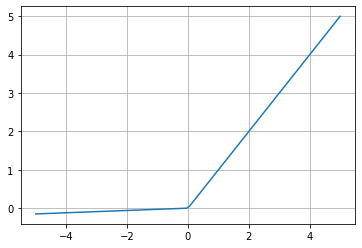

In [10]:
# NumPy implementation
def leaky_relu(x, alpha=0.03):
  """Computes the leaky ReLU function for a given input array."""
  return np.maximum(alpha * x, x)

x = np.linspace(-5, 5, 100)
y = leaky_relu(x)
plt.plot(x,y)
plt.grid()
plt.show()

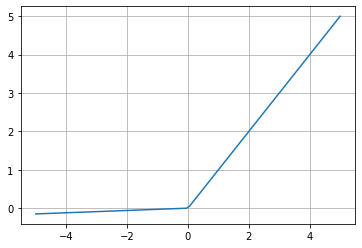

In [11]:
# torch implementation
def leaky_relu(x, alpha=0.03):
  """Computes the leaky ReLU function for a given input tensor."""
  return torch.maximum(alpha * x, x)

x = torch.linspace(-5, 5, 100)
y = leaky_relu(x)
plt.plot(x,y)
plt.grid()
plt.show()

<h2>Softmax (we described it in tutorial # 10)</h2>

<h3 style='color:yellow'>Used as an output layer for the multiclass classification models </h3>


$$
\Large \color{yellow}{S(y)_i}= \frac{e ^{y_i}}{\Sigma e^{y_i}}
$$

In [ ]:

# Option 1: Incorporating the Activation Function as a Separate Line of Code within the nn.Module
class NNET(nn.Module):
    def __init__(self,input_size, hidden_size, *args, **kwargs):
        super(NNET,self).__init__(*args, **kwargs)
        self.linear=nn.Linear(input_size,hidden_size)
        self.relu=nn.ReLU()
        self.liner2=nn.Linear(hidden_size,1)
        self.sigmoid=nn.Sigmoid()
    
    def forward(self,x):
        out=self.linear(x)
        out=self.relu(out)
        out=self.liner2(out)
        out=self.sigmoid(out)
        return out

In [13]:
# Option 2: Implementing the Activation Function Directly in the Forward Pass
class NNET(nn.Module):
    def __init__(self,input_size, hidden_size, *args, **kwargs):
        super(NNET,self).__init__(*args, **kwargs)
        self.linear=nn.Linear(input_size,hidden_size)
        self.liner2=nn.Linear(hidden_size,1)
    
    def forward(self,x):
        out=torch.relu(self.linear(x))
        out=torch.sigmoid(self.relu(out))
        return out